In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random

sf18 = pd.read_csv("sf18_weathermerged.csv")

#sf18.count()

In [3]:
sf18.head()

,Unnamed: 0,starttime_weather,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,...,Date_e,Weekday_e,Hour_e,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,max_temp,min_temp,precip
0,0,2018-01-31 22:00:00,2018-01-31 22:52:36,2018-02-01 19:47:20,120,285,Mission Dolores Park,Webster St at O'Farrell St,2765,Subscriber,...,2018-02-01,3,19,37.761420,-122.426435,37.783521,-122.431158,16.7,16.7,0.0
1,1,2018-01-31 22:00:00,2018-01-31 22:58:45,2018-02-01 00:46:42,236,160,Market St at 8th St,West Oakland BART Station,1306,Customer,...,2018-02-01,3,0,37.803686,-122.282497,37.805318,-122.294837,16.7,16.7,0.0
2,2,2018-01-31 22:00:00,2018-01-31 22:53:42,2018-01-31 23:08:22,123,145,Folsom St at 19th St,29th St at Church St,3725,Subscriber,...,2018-01-31,2,23,37.760594,-122.414817,37.743684,-122.426806,16.7,16.7,0.0
3,3,2018-01-31 22:00:00,2018-01-31 22:45:38,2018-01-31 23:05:48,285,133,Webster St at O'Farrell St,Valencia St at 22nd St,1059,Subscriber,...,2018-01-31,2,23,37.783521,-122.431158,37.755213,-122.420975,16.7,16.7,0.0
4,4,2018-01-31 22:00:00,2018-01-31 22:53:28,2018-01-31 23:03:21,202,195,Washington St at 8th St,Bay Pl at Vernon St,1834,Customer,...,2018-01-31,2,23,37.800754,-122.274894,37.812314,-122.260779,16.7,16.7,0.0


In [4]:
sf18.drop(['Unnamed: 0'], axis = 1, inplace= True)
sf18.head()

,starttime_weather,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration [s],...,Date_e,Weekday_e,Hour_e,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,max_temp,min_temp,precip
0,2018-01-31 22:00:00,2018-01-31 22:52:36,2018-02-01 19:47:20,120,285,Mission Dolores Park,Webster St at O'Farrell St,2765,Subscriber,75284.0,...,2018-02-01,3,19,37.761420,-122.426435,37.783521,-122.431158,16.7,16.7,0.0
1,2018-01-31 22:00:00,2018-01-31 22:58:45,2018-02-01 00:46:42,236,160,Market St at 8th St,West Oakland BART Station,1306,Customer,6477.0,...,2018-02-01,3,0,37.803686,-122.282497,37.805318,-122.294837,16.7,16.7,0.0
2,2018-01-31 22:00:00,2018-01-31 22:53:42,2018-01-31 23:08:22,123,145,Folsom St at 19th St,29th St at Church St,3725,Subscriber,880.0,...,2018-01-31,2,23,37.760594,-122.414817,37.743684,-122.426806,16.7,16.7,0.0
3,2018-01-31 22:00:00,2018-01-31 22:45:38,2018-01-31 23:05:48,285,133,Webster St at O'Farrell St,Valencia St at 22nd St,1059,Subscriber,1210.0,...,2018-01-31,2,23,37.783521,-122.431158,37.755213,-122.420975,16.7,16.7,0.0
4,2018-01-31 22:00:00,2018-01-31 22:53:28,2018-01-31 23:03:21,202,195,Washington St at 8th St,Bay Pl at Vernon St,1834,Customer,593.0,...,2018-01-31,2,23,37.800754,-122.274894,37.812314,-122.260779,16.7,16.7,0.0


<H3>We would like to look at the number of rides per hour, grouping by weekdays and weekends to draw insight on users demandpatterns.</H3>

In [5]:
sf18_weekday = sf18[(sf18.Weekday_s < 5)]
sf18_weekend = sf18[(sf18.Weekday_s > 4)]

In [6]:
totaluse_hour = sf18.groupby(['Hour_e']).Hour_e.count().reset_index(name = "hour_start_frequency")
totaluse_hour

,Hour_e,hour_start_frequency
0,0,11422
1,1,6143
2,2,4195
3,3,2197
4,4,2474
5,5,8533
6,6,30370
7,7,85707
8,8,189890
9,9,176544


<AxesSubplot:xlabel='Hour_e', ylabel='hour_start_frequency'>

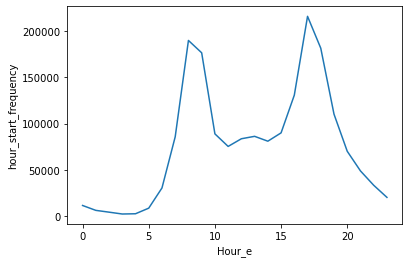

In [7]:
sns.lineplot(data=totaluse_hour, x="Hour_e", y="hour_start_frequency")

In [8]:
weekdayuse_hour = sf18_weekday.groupby(['Hour_e']).Hour_e.count().reset_index(name = "hour_start_frequency")
weekdayuse_hour

,Hour_e,hour_start_frequency
0,0,6924
1,1,3142
2,2,2151
3,3,1237
4,4,1878
5,5,7697
6,6,28789
7,7,82100
8,8,181736
9,9,163534


<AxesSubplot:xlabel='Hour_e', ylabel='hour_start_frequency'>

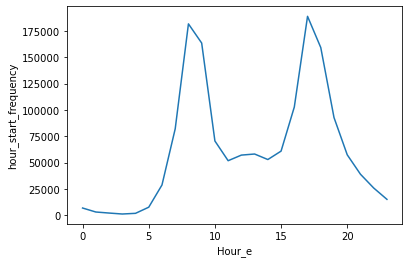

In [9]:
sns.lineplot(data=weekdayuse_hour, x="Hour_e", y="hour_start_frequency")

In [10]:
weekenduse_hour = sf18_weekend.groupby(['Hour_e']).Hour_e.count().reset_index(name = "hour_start_frequency")
weekenduse_hour

,Hour_e,hour_start_frequency
0,0,4498
1,1,3001
2,2,2044
3,3,960
4,4,596
5,5,836
6,6,1581
7,7,3607
8,8,8154
9,9,13010


<AxesSubplot:xlabel='Hour_e', ylabel='hour_start_frequency'>

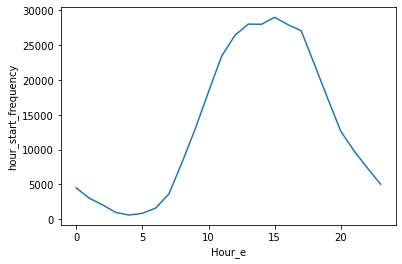

In [11]:
sns.lineplot(data=weekenduse_hour, x="Hour_e", y="hour_start_frequency")

Merge Weekday and weekend 

In [12]:
week = pd.merge(weekdayuse_hour, weekenduse_hour, on='Hour_e',  how='left')
week.columns = ['Hour_e', 'Frequency_Weekday', 'Frequency_Weekend']
week

,Hour_e,Frequency_Weekday,Frequency_Weekend
0,0,6924,4498
1,1,3142,3001
2,2,2151,2044
3,3,1237,960
4,4,1878,596
5,5,7697,836
6,6,28789,1581
7,7,82100,3607
8,8,181736,8154
9,9,163534,13010


Merge total with weekday and weekend

In [13]:
week = pd.merge(week, totaluse_hour, on='Hour_e',  how='left')
week.columns = ['Hour_e', 'Frequency_Weekday', 'Frequency_Weekend', 'Frequency_Total']
week

,Hour_e,Frequency_Weekday,Frequency_Weekend,Frequency_Total
0,0,6924,4498,11422
1,1,3142,3001,6143
2,2,2151,2044,4195
3,3,1237,960,2197
4,4,1878,596,2474
5,5,7697,836,8533
6,6,28789,1581,30370
7,7,82100,3607,85707
8,8,181736,8154,189890
9,9,163534,13010,176544


We do not need the hour column, we can use the index instead.

In [14]:
week.drop(['Hour_e'], axis = 1, inplace= True)
week

,Frequency_Weekday,Frequency_Weekend,Frequency_Total
0,6924,4498,11422
1,3142,3001,6143
2,2151,2044,4195
3,1237,960,2197
4,1878,596,2474
5,7697,836,8533
6,28789,1581,30370
7,82100,3607,85707
8,181736,8154,189890
9,163534,13010,176544


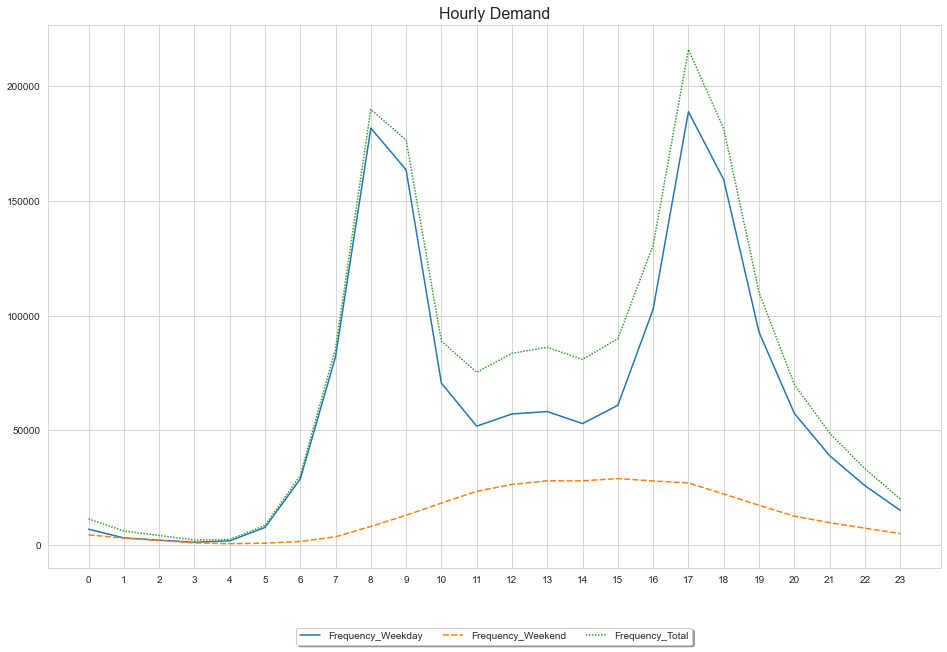

In [15]:
fig = plt.figure(figsize=(16,10))

sns.set_style("whitegrid")
plot = sns.lineplot(data=week)
plot.set_xticks(range(len(week)))
plot.set_xticklabels(['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23'])

plot.set_title("Hourly Demand",fontsize=16)

plt.legend(loc = 'upper center', bbox_to_anchor = (0.5,-0.1), ncol = 3, fancybox = True, shadow = True)
plt.show(block=True);
fig.savefig("demand.pdf")

<H3>We would like to see if there is a difference in usage patterns between subscribers and customers. </H3>

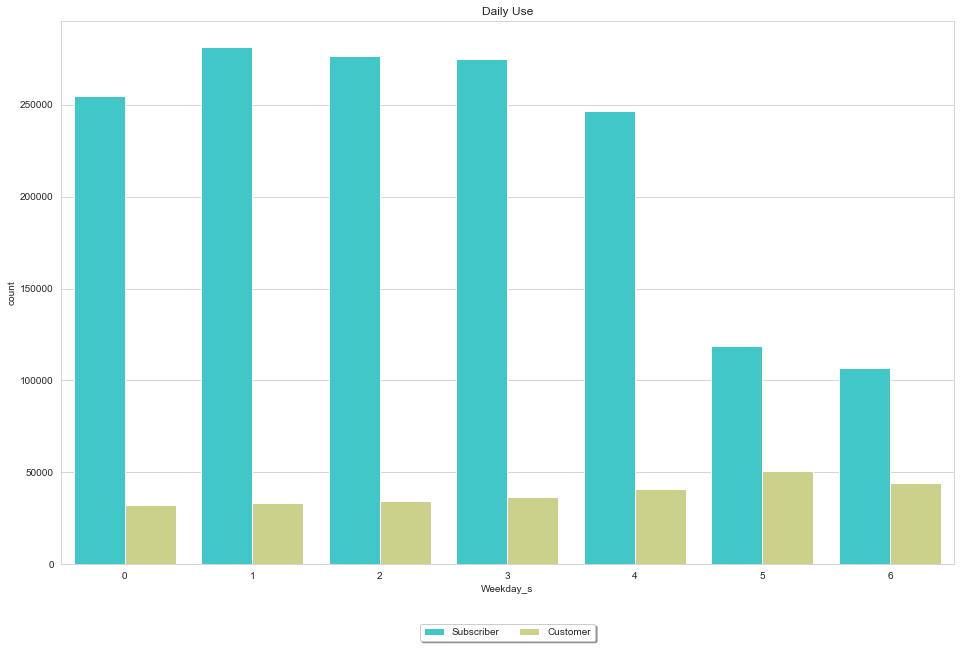

In [17]:
fig = plt.figure(figsize=(16,10))

sns.countplot(x = 'Weekday_s', hue = 'user_type', data = sf18, palette = 'rainbow')
plt.title('Daily Use')
#plot.set_xticks(7)
#plot.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])


plt.legend(loc = 'upper center', bbox_to_anchor = (0.5,-0.1), ncol = 3, fancybox = True, shadow = True)
plt.show(block=True);
plt.show()
fig.savefig("differenceUserTypes.pdf")

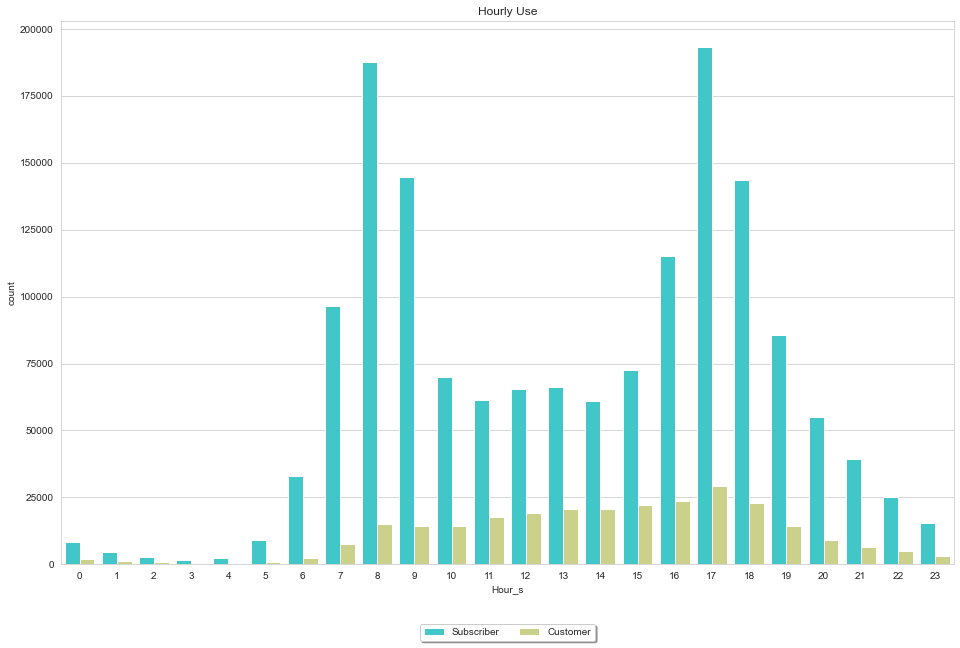

In [18]:
fig = plt.figure(figsize=(16,10))

sns.countplot(x = 'Hour_s', hue = 'user_type', data = sf18, palette = 'rainbow')
plt.title('Hourly Use')

plt.legend(loc = 'upper center', bbox_to_anchor = (0.5,-0.1), ncol = 3, fancybox = True, shadow = True)
plt.show(block=True);
plt.show()
fig.savefig("hourlyUse_diffUserTypes.pdf")

Add additional month column:

In [19]:
sf18['month'] = pd.DatetimeIndex(sf18['start_time']).month
sf18

,starttime_weather,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration [s],...,Weekday_e,Hour_e,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,max_temp,min_temp,precip,month
0,2018-01-31 22:00:00,2018-01-31 22:52:36,2018-02-01 19:47:20,120,285,Mission Dolores Park,Webster St at O'Farrell St,2765,Subscriber,75284.0,...,3,19,37.761420,-122.426435,37.783521,-122.431158,16.7,16.7,0.0,1
1,2018-01-31 22:00:00,2018-01-31 22:58:45,2018-02-01 00:46:42,236,160,Market St at 8th St,West Oakland BART Station,1306,Customer,6477.0,...,3,0,37.803686,-122.282497,37.805318,-122.294837,16.7,16.7,0.0,1
2,2018-01-31 22:00:00,2018-01-31 22:53:42,2018-01-31 23:08:22,123,145,Folsom St at 19th St,29th St at Church St,3725,Subscriber,880.0,...,2,23,37.760594,-122.414817,37.743684,-122.426806,16.7,16.7,0.0,1
3,2018-01-31 22:00:00,2018-01-31 22:45:38,2018-01-31 23:05:48,285,133,Webster St at O'Farrell St,Valencia St at 22nd St,1059,Subscriber,1210.0,...,2,23,37.783521,-122.431158,37.755213,-122.420975,16.7,16.7,0.0,1
4,2018-01-31 22:00:00,2018-01-31 22:53:28,2018-01-31 23:03:21,202,195,Washington St at 8th St,Bay Pl at Vernon St,1834,Customer,593.0,...,2,23,37.800754,-122.274894,37.812314,-122.260779,16.7,16.7,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833011,2018-12-01 00:00:00,2018-12-01 00:11:55,2018-12-01 00:19:49,345,81,Hubbell St at 16th St,Berry St at 4th St,3035,Subscriber,474.0,...,5,0,37.766474,-122.398295,37.775880,-122.393170,15.0,15.0,0.0,12
1833012,2018-12-01 00:00:00,2018-12-01 00:02:49,2018-12-01 00:16:50,10,58,Washington St at Kearny St,Market St at 10th St,2034,Subscriber,841.0,...,5,0,37.795393,-122.404770,37.776619,-122.417385,15.0,15.0,0.0,12
1833013,2018-12-01 00:00:00,2018-12-01 00:05:28,2018-12-01 00:09:48,245,255,Downtown Berkeley BART,Virginia St at Shattuck Ave,2243,Subscriber,260.0,...,5,0,37.870348,-122.267764,37.876573,-122.269528,15.0,15.0,0.0,12
1833014,2018-12-01 00:00:00,2018-12-01 00:03:07,2018-12-01 00:08:00,93,126,4th St at Mission Bay Blvd S,Esprit Park,545,Subscriber,293.0,...,5,0,37.770407,-122.391198,37.761634,-122.390648,15.0,15.0,0.0,12


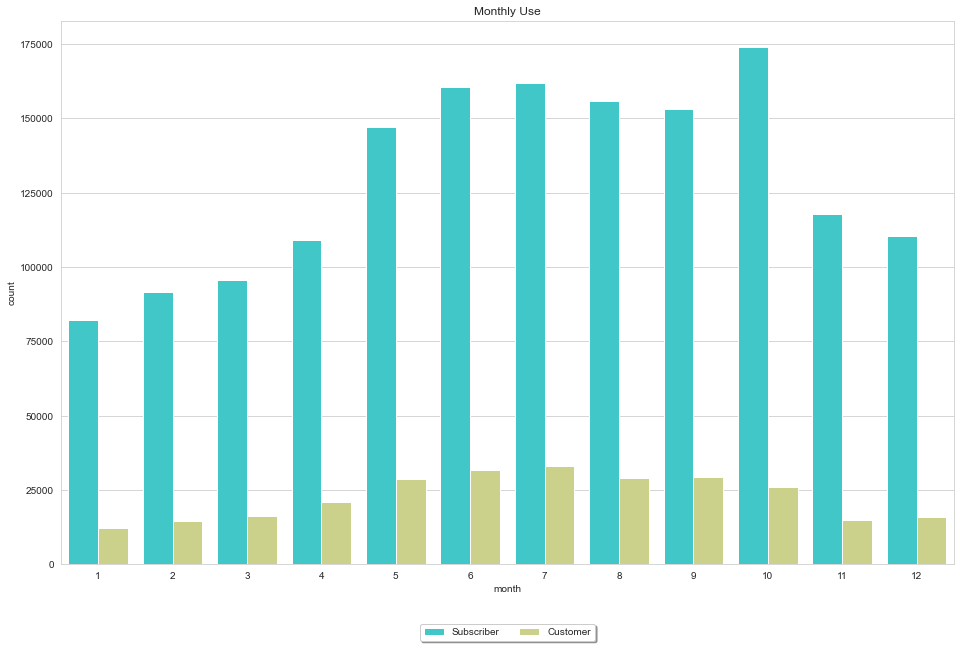

In [20]:
fig = plt.figure(figsize=(16,10))

sns.countplot(x = 'month', hue = 'user_type', data = sf18, palette = 'rainbow')
plt.title('Monthly Use')

plt.legend(loc = 'upper center', bbox_to_anchor = (0.5,-0.1), ncol = 3, fancybox = True, shadow = True)
plt.show(block=True);
plt.show()
fig.savefig("monthlyUse.pdf")

<H4>Now we want to analyze the duration a bit futher.</H4>

In [21]:
sf18

,starttime_weather,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration [s],...,Weekday_e,Hour_e,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,max_temp,min_temp,precip,month
0,2018-01-31 22:00:00,2018-01-31 22:52:36,2018-02-01 19:47:20,120,285,Mission Dolores Park,Webster St at O'Farrell St,2765,Subscriber,75284.0,...,3,19,37.761420,-122.426435,37.783521,-122.431158,16.7,16.7,0.0,1
1,2018-01-31 22:00:00,2018-01-31 22:58:45,2018-02-01 00:46:42,236,160,Market St at 8th St,West Oakland BART Station,1306,Customer,6477.0,...,3,0,37.803686,-122.282497,37.805318,-122.294837,16.7,16.7,0.0,1
2,2018-01-31 22:00:00,2018-01-31 22:53:42,2018-01-31 23:08:22,123,145,Folsom St at 19th St,29th St at Church St,3725,Subscriber,880.0,...,2,23,37.760594,-122.414817,37.743684,-122.426806,16.7,16.7,0.0,1
3,2018-01-31 22:00:00,2018-01-31 22:45:38,2018-01-31 23:05:48,285,133,Webster St at O'Farrell St,Valencia St at 22nd St,1059,Subscriber,1210.0,...,2,23,37.783521,-122.431158,37.755213,-122.420975,16.7,16.7,0.0,1
4,2018-01-31 22:00:00,2018-01-31 22:53:28,2018-01-31 23:03:21,202,195,Washington St at 8th St,Bay Pl at Vernon St,1834,Customer,593.0,...,2,23,37.800754,-122.274894,37.812314,-122.260779,16.7,16.7,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833011,2018-12-01 00:00:00,2018-12-01 00:11:55,2018-12-01 00:19:49,345,81,Hubbell St at 16th St,Berry St at 4th St,3035,Subscriber,474.0,...,5,0,37.766474,-122.398295,37.775880,-122.393170,15.0,15.0,0.0,12
1833012,2018-12-01 00:00:00,2018-12-01 00:02:49,2018-12-01 00:16:50,10,58,Washington St at Kearny St,Market St at 10th St,2034,Subscriber,841.0,...,5,0,37.795393,-122.404770,37.776619,-122.417385,15.0,15.0,0.0,12
1833013,2018-12-01 00:00:00,2018-12-01 00:05:28,2018-12-01 00:09:48,245,255,Downtown Berkeley BART,Virginia St at Shattuck Ave,2243,Subscriber,260.0,...,5,0,37.870348,-122.267764,37.876573,-122.269528,15.0,15.0,0.0,12
1833014,2018-12-01 00:00:00,2018-12-01 00:03:07,2018-12-01 00:08:00,93,126,4th St at Mission Bay Blvd S,Esprit Park,545,Subscriber,293.0,...,5,0,37.770407,-122.391198,37.761634,-122.390648,15.0,15.0,0.0,12


In [22]:
sf18.rename(columns={'duration [s]':'duration_sec'}, inplace=True)
sf18

,starttime_weather,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration_sec,...,Weekday_e,Hour_e,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,max_temp,min_temp,precip,month
0,2018-01-31 22:00:00,2018-01-31 22:52:36,2018-02-01 19:47:20,120,285,Mission Dolores Park,Webster St at O'Farrell St,2765,Subscriber,75284.0,...,3,19,37.761420,-122.426435,37.783521,-122.431158,16.7,16.7,0.0,1
1,2018-01-31 22:00:00,2018-01-31 22:58:45,2018-02-01 00:46:42,236,160,Market St at 8th St,West Oakland BART Station,1306,Customer,6477.0,...,3,0,37.803686,-122.282497,37.805318,-122.294837,16.7,16.7,0.0,1
2,2018-01-31 22:00:00,2018-01-31 22:53:42,2018-01-31 23:08:22,123,145,Folsom St at 19th St,29th St at Church St,3725,Subscriber,880.0,...,2,23,37.760594,-122.414817,37.743684,-122.426806,16.7,16.7,0.0,1
3,2018-01-31 22:00:00,2018-01-31 22:45:38,2018-01-31 23:05:48,285,133,Webster St at O'Farrell St,Valencia St at 22nd St,1059,Subscriber,1210.0,...,2,23,37.783521,-122.431158,37.755213,-122.420975,16.7,16.7,0.0,1
4,2018-01-31 22:00:00,2018-01-31 22:53:28,2018-01-31 23:03:21,202,195,Washington St at 8th St,Bay Pl at Vernon St,1834,Customer,593.0,...,2,23,37.800754,-122.274894,37.812314,-122.260779,16.7,16.7,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833011,2018-12-01 00:00:00,2018-12-01 00:11:55,2018-12-01 00:19:49,345,81,Hubbell St at 16th St,Berry St at 4th St,3035,Subscriber,474.0,...,5,0,37.766474,-122.398295,37.775880,-122.393170,15.0,15.0,0.0,12
1833012,2018-12-01 00:00:00,2018-12-01 00:02:49,2018-12-01 00:16:50,10,58,Washington St at Kearny St,Market St at 10th St,2034,Subscriber,841.0,...,5,0,37.795393,-122.404770,37.776619,-122.417385,15.0,15.0,0.0,12
1833013,2018-12-01 00:00:00,2018-12-01 00:05:28,2018-12-01 00:09:48,245,255,Downtown Berkeley BART,Virginia St at Shattuck Ave,2243,Subscriber,260.0,...,5,0,37.870348,-122.267764,37.876573,-122.269528,15.0,15.0,0.0,12
1833014,2018-12-01 00:00:00,2018-12-01 00:03:07,2018-12-01 00:08:00,93,126,4th St at Mission Bay Blvd S,Esprit Park,545,Subscriber,293.0,...,5,0,37.770407,-122.391198,37.761634,-122.390648,15.0,15.0,0.0,12


In [23]:
sf18_durationBelow5 = sf18[(sf18.duration_sec < 300)]
sf18_durationBelow5

,starttime_weather,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration_sec,...,Weekday_e,Hour_e,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,max_temp,min_temp,precip,month
12,2018-01-31 22:00:00,2018-01-31 22:55:26,2018-01-31 22:58:43,93,81,4th St at Mission Bay Blvd S,Berry St at 4th St,1403,Subscriber,197.0,...,2,22,37.770407,-122.391198,37.775880,-122.393170,16.7,16.7,0.0,1
17,2018-01-31 22:00:00,2018-01-31 22:44:29,2018-01-31 22:48:12,58,61,Market St at 10th St,Howard St at 8th St,3483,Subscriber,223.0,...,2,22,37.776619,-122.417385,37.776513,-122.411306,16.7,16.7,0.0,1
28,2018-01-31 22:00:00,2018-01-31 22:38:05,2018-01-31 22:41:35,160,230,West Oakland BART Station,14th St at Mandela Pkwy,2508,Subscriber,210.0,...,2,22,37.805318,-122.294837,37.810743,-122.291415,16.7,16.7,0.0,1
32,2018-01-31 22:00:00,2018-01-31 22:32:41,2018-01-31 22:36:46,44,58,Civic Center/UN Plaza BART Station (Market St ...,Market St at 10th St,1921,Subscriber,245.0,...,2,22,37.781074,-122.411738,37.776619,-122.417385,16.7,16.7,0.0,1
33,2018-01-31 22:00:00,2018-01-31 22:32:13,2018-01-31 22:34:20,85,96,Church St at Duboce Ave,Dolores St at 15th St,2886,Subscriber,127.0,...,2,22,37.770083,-122.429156,37.766210,-122.426614,16.7,16.7,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832997,2018-12-01 00:00:00,2018-12-01 00:36:02,2018-12-01 00:40:56,95,72,Sanchez St at 15th St,Page St at Scott St,1043,Subscriber,294.0,...,5,0,37.766219,-122.431060,37.772406,-122.435650,15.0,15.0,0.0,12
1833001,2018-12-01 00:00:00,2018-12-01 00:31:01,2018-12-01 00:35:30,98,121,Valencia St at 16th St,Mission Playground,3147,Subscriber,269.0,...,5,0,37.765052,-122.421866,37.759210,-122.421339,15.0,15.0,0.0,12
1833013,2018-12-01 00:00:00,2018-12-01 00:05:28,2018-12-01 00:09:48,245,255,Downtown Berkeley BART,Virginia St at Shattuck Ave,2243,Subscriber,260.0,...,5,0,37.870348,-122.267764,37.876573,-122.269528,15.0,15.0,0.0,12
1833014,2018-12-01 00:00:00,2018-12-01 00:03:07,2018-12-01 00:08:00,93,126,4th St at Mission Bay Blvd S,Esprit Park,545,Subscriber,293.0,...,5,0,37.770407,-122.391198,37.761634,-122.390648,15.0,15.0,0.0,12


In [24]:
sf18_durationBelow15 = sf18[(sf18.duration_sec > 300) & (sf18.duration_sec < 900)]
sf18_durationBelow15

,starttime_weather,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration_sec,...,Weekday_e,Hour_e,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,max_temp,min_temp,precip,month
2,2018-01-31 22:00:00,2018-01-31 22:53:42,2018-01-31 23:08:22,123,145,Folsom St at 19th St,29th St at Church St,3725,Subscriber,880.0,...,2,23,37.760594,-122.414817,37.743684,-122.426806,16.7,16.7,0.0,1
4,2018-01-31 22:00:00,2018-01-31 22:53:28,2018-01-31 23:03:21,202,195,Washington St at 8th St,Bay Pl at Vernon St,1834,Customer,593.0,...,2,23,37.800754,-122.274894,37.812314,-122.260779,16.7,16.7,0.0,1
6,2018-01-31 22:00:00,2018-01-31 22:56:32,2018-01-31 23:02:47,15,6,San Francisco Ferry Building (Harry Bridges Pl...,The Embarcadero at Sansome St,3401,Subscriber,375.0,...,2,23,37.795392,-122.394203,37.804770,-122.403234,16.7,16.7,0.0,1
9,2018-01-31 22:00:00,2018-01-31 22:55:49,2018-01-31 23:01:19,99,124,Folsom St at 15th St,19th St at Florida St,3379,Subscriber,330.0,...,2,23,37.767037,-122.415442,37.760447,-122.410807,16.7,16.7,0.0,1
10,2018-01-31 22:00:00,2018-01-31 22:45:39,2018-01-31 23:00:10,285,106,Webster St at O'Farrell St,Sanchez St at 17th St,1503,Customer,871.0,...,2,23,37.783521,-122.431158,37.763242,-122.430675,16.7,16.7,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833007,2018-12-01 00:00:00,2018-12-01 00:16:35,2018-12-01 00:25:33,5,39,Powell St BART Station (Market St at 5th St),Scott St at Golden Gate Ave,4384,Subscriber,538.0,...,5,0,37.783899,-122.408445,37.778999,-122.436861,15.0,15.0,0.0,12
1833008,2018-12-01 00:00:00,2018-12-01 00:12:50,2018-12-01 00:24:02,34,92,Father Alfred E Boeddeker Park,Mission Bay Kids Park,4377,Subscriber,672.0,...,5,0,37.783988,-122.412408,37.772301,-122.393028,15.0,15.0,0.0,12
1833009,2018-12-01 00:00:00,2018-12-01 00:14:42,2018-12-01 00:23:01,7,214,Frank H Ogawa Plaza,Market St at Brockhurst St,2236,Subscriber,499.0,...,5,0,37.804562,-122.271738,37.823321,-122.275733,15.0,15.0,0.0,12
1833011,2018-12-01 00:00:00,2018-12-01 00:11:55,2018-12-01 00:19:49,345,81,Hubbell St at 16th St,Berry St at 4th St,3035,Subscriber,474.0,...,5,0,37.766474,-122.398295,37.775880,-122.393170,15.0,15.0,0.0,12


In [25]:
sf18_durationBelow30 = sf18[(sf18.duration_sec > 900) & (sf18.duration_sec < 1800)]
sf18_durationBelow30

,starttime_weather,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration_sec,...,Weekday_e,Hour_e,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,max_temp,min_temp,precip,month
3,2018-01-31 22:00:00,2018-01-31 22:45:38,2018-01-31 23:05:48,285,133,Webster St at O'Farrell St,Valencia St at 22nd St,1059,Subscriber,1210.0,...,2,23,37.783521,-122.431158,37.755213,-122.420975,16.7,16.7,0.0,1
5,2018-01-31 22:00:00,2018-01-31 22:45:17,2018-01-31 23:02:57,141,79,Valencia St at Cesar Chavez St,7th St at Brannan St,1248,Subscriber,1060.0,...,2,23,37.747998,-122.420219,37.773492,-122.403672,16.7,16.7,0.0,1
13,2018-01-31 22:00:00,2018-01-31 22:33:07,2018-01-31 22:58:07,44,144,Civic Center/UN Plaza BART Station (Market St ...,Precita Park,2528,Subscriber,1500.0,...,2,22,37.781074,-122.411738,37.747300,-122.411403,16.7,16.7,0.0,1
15,2018-01-31 22:00:00,2018-01-31 22:32:19,2018-01-31 22:54:04,76,59,McCoppin St at Valencia St,S Van Ness Ave at Market St,2421,Subscriber,1305.0,...,2,22,37.771662,-122.422423,37.774814,-122.418954,16.7,16.7,0.0,1
20,2018-01-31 22:00:00,2018-01-31 22:30:31,2018-01-31 22:46:04,141,124,Valencia St at Cesar Chavez St,19th St at Florida St,557,Subscriber,933.0,...,2,22,37.747998,-122.420219,37.760447,-122.410807,16.7,16.7,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832995,2018-12-01 00:00:00,2018-12-01 00:13:36,2018-12-01 00:41:35,240,245,Haste St at Telegraph Ave,Downtown Berkeley BART,3701,Customer,1679.0,...,5,0,37.866043,-122.258804,37.870348,-122.267764,15.0,15.0,0.0,12
1832996,2018-12-01 00:00:00,2018-12-01 00:13:34,2018-12-01 00:41:12,240,245,Haste St at Telegraph Ave,Downtown Berkeley BART,3625,Customer,1658.0,...,5,0,37.866043,-122.258804,37.870348,-122.267764,15.0,15.0,0.0,12
1833000,2018-12-01 00:00:00,2018-12-01 00:09:18,2018-12-01 00:37:32,14,147,Clay St at Battery St,29th St at Tiffany Ave,209,Subscriber,1694.0,...,5,0,37.795001,-122.399970,37.744067,-122.421472,15.0,15.0,0.0,12
1833004,2018-12-01 00:00:00,2018-12-01 00:11:05,2018-12-01 00:30:32,160,155,West Oakland BART Station,Emeryville Public Market,1579,Subscriber,1167.0,...,5,0,37.805318,-122.294837,37.840521,-122.293528,15.0,15.0,0.0,12


In [26]:
sf18_durationBelow60 = sf18[(sf18.duration_sec > 1800) & (sf18.duration_sec < 3600)]
sf18_durationBelow60

,starttime_weather,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration_sec,...,Weekday_e,Hour_e,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,max_temp,min_temp,precip,month
8,2018-01-31 22:00:00,2018-01-31 22:24:40,2018-01-31 23:01:40,30,81,San Francisco Caltrain (Townsend St at 4th St),Berry St at 4th St,1757,Subscriber,2220.0,...,2,23,37.776598,-122.395282,37.775880,-122.393170,16.7,16.7,0.0,1
11,2018-01-31 22:00:00,2018-01-31 22:25:01,2018-01-31 22:58:54,182,266,19th Street BART Station,Parker St at Fulton St,2169,Subscriber,2033.0,...,2,22,37.809013,-122.268247,37.862464,-122.264791,16.7,16.7,0.0,1
101,2018-01-31 16:00:00,2018-01-31 16:31:15,2018-01-31 17:05:24,33,33,Golden Gate Ave at Hyde St,Golden Gate Ave at Hyde St,3400,Subscriber,2049.0,...,2,17,37.781650,-122.415408,37.781650,-122.415408,6.7,6.7,0.0,1
146,2018-01-31 16:00:00,2018-01-31 16:19:52,2018-01-31 16:57:26,71,13,Broderick St at Oak St,Commercial St at Montgomery St,2308,Subscriber,2254.0,...,2,16,37.773063,-122.439078,37.794231,-122.402923,6.7,6.7,0.0,1
235,2018-01-31 16:00:00,2018-01-31 16:05:24,2018-01-31 16:40:27,339,18,Jackson St at 11th St,Telegraph Ave at Alcatraz Ave,703,Customer,2103.0,...,2,16,37.800002,-122.266438,37.850222,-122.260172,6.7,6.7,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832968,2018-12-01 00:00:00,2018-12-01 00:30:13,2018-12-01 01:21:47,33,42,Golden Gate Ave at Hyde St,San Francisco City Hall (Polk St at Grove St),2224,Subscriber,3094.0,...,5,1,37.781650,-122.415408,37.778650,-122.418230,15.0,15.0,0.0,12
1832970,2018-12-01 00:00:00,2018-12-01 00:36:32,2018-12-01 01:12:23,245,245,Downtown Berkeley BART,Downtown Berkeley BART,238,Customer,2151.0,...,5,1,37.870348,-122.267764,37.870348,-122.267764,15.0,15.0,0.0,12
1832971,2018-12-01 00:00:00,2018-12-01 00:36:10,2018-12-01 01:12:19,245,245,Downtown Berkeley BART,Downtown Berkeley BART,3472,Customer,2169.0,...,5,1,37.870348,-122.267764,37.870348,-122.267764,15.0,15.0,0.0,12
1832992,2018-12-01 00:00:00,2018-12-01 00:09:56,2018-12-01 00:44:27,36,97,Folsom St at 3rd St,14th St at Mission St,316,Customer,2071.0,...,5,0,37.783830,-122.398870,37.768265,-122.420110,15.0,15.0,0.0,12


In [27]:
sf18_durationAbove60 = sf18[(sf18.duration_sec > 3600)]
sf18_durationAbove60

,starttime_weather,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration_sec,...,Weekday_e,Hour_e,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,max_temp,min_temp,precip,month
0,2018-01-31 22:00:00,2018-01-31 22:52:36,2018-02-01 19:47:20,120,285,Mission Dolores Park,Webster St at O'Farrell St,2765,Subscriber,75284.0,...,3,19,37.761420,-122.426435,37.783521,-122.431158,16.7,16.7,0.0,1
1,2018-01-31 22:00:00,2018-01-31 22:58:45,2018-02-01 00:46:42,236,160,Market St at 8th St,West Oakland BART Station,1306,Customer,6477.0,...,3,0,37.803686,-122.282497,37.805318,-122.294837,16.7,16.7,0.0,1
60,2018-01-31 16:00:00,2018-01-31 16:13:35,2018-02-01 15:57:18,15,15,San Francisco Ferry Building (Harry Bridges Pl...,San Francisco Ferry Building (Harry Bridges Pl...,2815,Customer,85423.0,...,3,15,37.795392,-122.394203,37.795392,-122.394203,6.7,6.7,0.0,1
61,2018-01-31 16:00:00,2018-01-31 16:17:52,2018-01-31 18:32:46,321,24,5th St at Folsom,Spear St at Folsom St,3185,Customer,8094.0,...,2,18,37.780146,-122.403071,37.789677,-122.390428,6.7,6.7,0.0,1
62,2018-01-31 16:00:00,2018-01-31 16:00:52,2018-01-31 18:17:51,6,10,The Embarcadero at Sansome St,Washington St at Kearny St,2157,Customer,8219.0,...,2,18,37.804770,-122.403234,37.795393,-122.404770,6.7,6.7,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832913,2018-12-01 01:00:00,2018-12-01 01:34:22,2018-12-01 03:29:56,238,259,MLK Jr Way at University Ave,Addison St at Fourth St,2435,Customer,6934.0,...,5,3,37.871719,-122.273068,37.866249,-122.299371,13.9,13.9,0.0,12
1832914,2018-12-01 01:00:00,2018-12-01 01:55:25,2018-12-01 03:09:33,349,92,Howard St at Mary St,Mission Bay Kids Park,4438,Customer,4448.0,...,5,3,37.781010,-122.405666,37.772301,-122.393028,13.9,13.9,0.0,12
1832916,2018-12-01 01:00:00,2018-12-01 01:12:40,2018-12-01 02:32:03,119,118,18th St at Noe St,Eureka Valley Recreation Center,4400,Customer,4763.0,...,5,2,37.761047,-122.432642,37.759177,-122.436943,13.9,13.9,0.0,12
1832917,2018-12-01 01:00:00,2018-12-01 01:24:02,2018-12-01 02:30:43,368,41,Myrtle St at Polk St,Golden Gate Ave at Polk St,1286,Subscriber,4001.0,...,5,2,37.785434,-122.419622,37.781270,-122.418740,13.9,13.9,0.0,12


In [28]:
sf18_durationBelow5 = sf18_durationBelow5.groupby(['Weekday_s']).Weekday_s.count().reset_index(name = "count_of_rides_under_5min")
sf18_durationBelow5

,Weekday_s,count_of_rides_under_5min
0,0,53000
1,1,58820
2,2,57716
3,3,57502
4,4,51602
5,5,25634
6,6,24307


In [29]:
sf18_durationBelow15 = sf18_durationBelow15.groupby(['Weekday_s']).Weekday_s.count().reset_index(name = "count_of_rides_under_15min")
sf18_durationBelow15

,Weekday_s,count_of_rides_under_15min
0,0,173105
1,1,191194
2,2,188577
3,3,188296
4,4,170353
5,5,84499
6,6,74677


In [28]:
chi19_durationBelow30 = chi19_durationBelow30.groupby(['Weekday_s']).Weekday_s.count().reset_index(name = "count_of_rides_under_30min")
chi19_durationBelow30

,Weekday_s,count_of_rides_under_30min
0,0,134593
1,1,139676
2,2,140933
3,3,141508
4,4,139168
5,5,143787
6,6,123407


In [30]:
sf18_durationBelow60 = sf18_durationBelow60.groupby(['Weekday_s']).Weekday_s.count().reset_index(name = "count_of_rides_under_60min")
sf18_durationBelow60

,Weekday_s,count_of_rides_under_60min
0,0,7466
1,1,7196
2,2,7521
3,3,7677
4,4,8800
5,5,11873
6,6,10904


In [32]:
sf18_durationAbove60 = sf18_durationAbove60.groupby(['Weekday_s']).Weekday_s.count().reset_index(name = "count_of_rides_over_60min")
sf18_durationAbove60

,Weekday_s,count_of_rides_over_60min
0,0,3536
1,1,3376
2,2,3187
3,3,3510
4,4,4211
5,5,6892
6,6,6323


In [33]:
mergedDurations = pd.merge(
                            (pd.merge(pd.merge(sf18_durationBelow5, sf18_durationBelow15, on = "Weekday_s", how="left"), 
                            pd.merge(sf18_durationBelow30, sf18_durationBelow60, on = "Weekday_s", how="left"), on ="Weekday_s",  how='left')), sf18_durationAbove60,on ="Weekday_s",  how='left') 
mergedDurations

,Weekday_s,count_of_rides_under_5min,count_of_rides_under_15min,starttime_weather,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,...,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,max_temp,min_temp,precip,month,count_of_rides_under_60min,count_of_rides_over_60min
0,0,53000,173105,2018-01-29 16:00:00,2018-01-29 16:59:55,2018-01-29 17:29:31,130,132,22nd St Caltrain Station,24th St at Chattanooga St,...,37.757369,-122.392057,37.751819,-122.426614,10.0,10.0,0.0,1,7466,3536
1,0,53000,173105,2018-01-29 16:00:00,2018-01-29 16:57:10,2018-01-29 17:26:19,101,137,San Bruno Ave at 16th St,Jersey St at Castro St,...,37.766008,-122.405677,37.750506,-122.433950,10.0,10.0,0.0,1,7466,3536
2,0,53000,173105,2018-01-29 16:00:00,2018-01-29 16:51:57,2018-01-29 17:18:30,34,30,Father Alfred E Boeddeker Park,San Francisco Caltrain (Townsend St at 4th St),...,37.783988,-122.412408,37.776598,-122.395282,10.0,10.0,0.0,1,7466,3536
3,0,53000,173105,2018-01-29 16:00:00,2018-01-29 16:59:19,2018-01-29 17:17:47,41,114,Golden Gate Ave at Polk St,Rhode Island St at 17th St,...,37.781270,-122.418740,37.764478,-122.402570,10.0,10.0,0.0,1,7466,3536
4,0,53000,173105,2018-01-29 16:00:00,2018-01-29 16:57:43,2018-01-29 17:17:12,126,15,Esprit Park,San Francisco Ferry Building (Harry Bridges Pl...,...,37.761634,-122.390648,37.795392,-122.394203,10.0,10.0,0.0,1,7466,3536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337770,6,24307,74677,2018-12-02 00:00:00,2018-12-02 00:21:12,2018-12-02 00:48:38,120,71,Mission Dolores Park,Broderick St at Oak St,...,37.761420,-122.426435,37.773063,-122.439078,13.9,13.9,0.0,12,10904,6323
337771,6,24307,74677,2018-12-02 00:00:00,2018-12-02 00:24:15,2018-12-02 00:42:00,327,277,5th St at San Salvador St,Morrison Ave at Julian St,...,37.332039,-121.881766,37.333658,-121.908586,13.9,13.9,0.0,12,10904,6323
337772,6,24307,74677,2018-12-02 00:00:00,2018-12-02 00:25:42,2018-12-02 00:41:04,41,147,Golden Gate Ave at Polk St,29th St at Tiffany Ave,...,37.781270,-122.418740,37.744067,-122.421472,13.9,13.9,0.0,12,10904,6323
337773,6,24307,74677,2018-12-02 00:00:00,2018-12-02 00:20:53,2018-12-02 00:37:49,67,136,San Francisco Caltrain Station 2 (Townsend St...,23rd St at San Bruno Ave,...,37.776639,-122.395526,37.754436,-122.404364,13.9,13.9,0.0,12,10904,6323


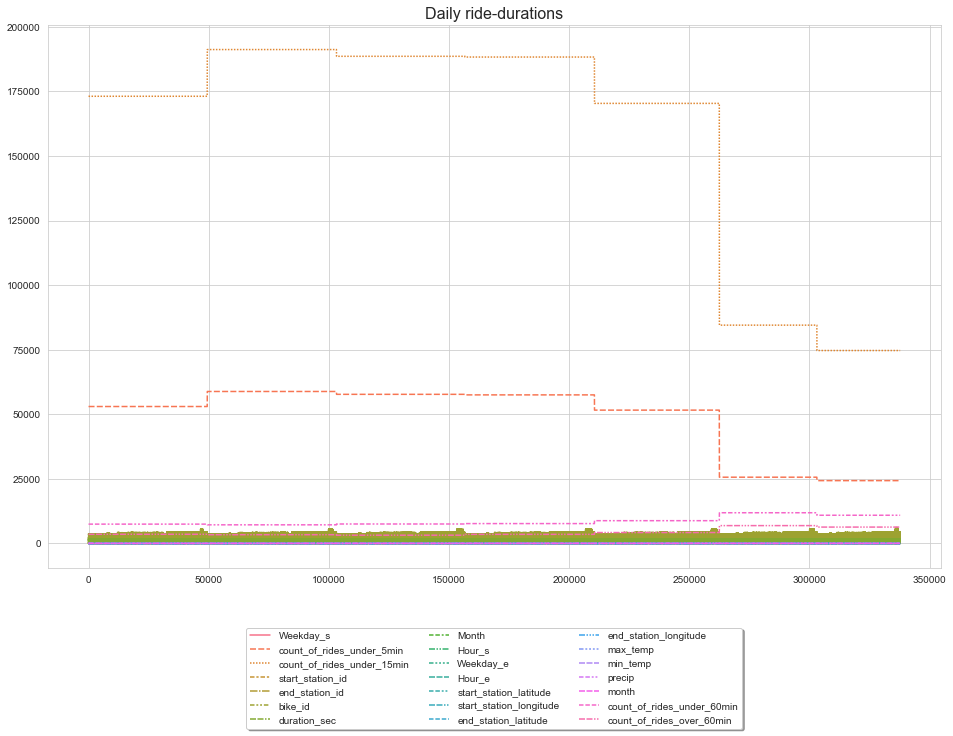

In [34]:
fig = plt.figure(figsize=(16,10))

sns.set_style("whitegrid")
plot = sns.lineplot(data=mergedDurations)
#plot.set_xticks(range(len(mergedDurations)))
#plot.set_xticklabels(['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23'])

plot.set_title("Daily ride-durations",fontsize=16)

plt.legend(loc = 'upper center', bbox_to_anchor = (0.5,-0.1), ncol = 3, fancybox = True, shadow = True)
plt.show(block=True);
fig.savefig("dailyRideDurations.pdf")